# Introduction

This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## 1. Importing all the important Python Libraries and Files.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.width', 1000)

In [2]:
# prev_app as previous applications data set and new_app as new applications data set...
prev_app=pd.read_csv(r'C:\Users\Nikhil Bhati\Downloads\previous_application.csv')
new_app=pd.read_csv(r'C:\Users\Nikhil Bhati\Downloads\application_data.csv')

## 2. Doing the data check of New Applicants

In [3]:
# Viewing the data of ther current applicants...
new_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Cheking the shape of the data...
new_app.shape

(307511, 122)

In [5]:
# Summary of the data of the current applicants...
new_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
# Info of the data of the current applicants...
new_app.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## 3. Doing the Data check on the Previous Applications.

In [7]:
# Viewing the previous application data...
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Checking the shape of the data...
prev_app.shape

(1670214, 37)

In [9]:
# Summary of the data of the previous applicants...
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [10]:
# Info of the data of the pervious applicants...
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## 4. Finding the Missing values/Null values New applications data set.

In [11]:
#Calculating the percentage of the Null Values...
round(new_app.isnull().mean()*100,2).sort_values(ascending = False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [12]:
# Dropping columns with the Null values equal and more than 50%...
new_app = new_app.loc[:,new_app.isnull().mean()<=0.5]
new_app.shape

(307511, 81)

In [13]:
# Checking the remaining Null value columns...
list(new_app.columns[(new_app.isnull().mean()>0)]) 

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [14]:
# Removing the unnecessary columns for the upcoming data analysis...
new_app = new_app.loc[:,new_app.isnull().mean()<=0.4]
new_app.shape
# FLOORSMAX_MODE                  49.76
#FLOORSMAX_MEDI                  49.76
#FLOORSMAX_AVG                   49.76
#YEARS_BEGINEXPLUATATION_MODE    48.78
#YEARS_BEGINEXPLUATATION_MEDI    48.78
#YEARS_BEGINEXPLUATATION_AVG     48.78
#TOTALAREA_MODE                  48.27
#EMERGENCYSTATE_MODE             47.40
# Above mentioned columns won't come handy in our further analysis...

(307511, 73)

In [15]:
# Checking the remaining Null value columns...
list(new_app.columns[(new_app.isnull().mean()>0)]) 

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

## 5. Imputing the Null values from New Application Data Set.

### 5.1 EXT_SOURCE_2 imputation

In [16]:
new_app['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.157007      1
0.721955      1
0.032513      1
0.204329      1
0.064909      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

We will be checking for outliers in EXT_SOURCE_2 using boxplot.

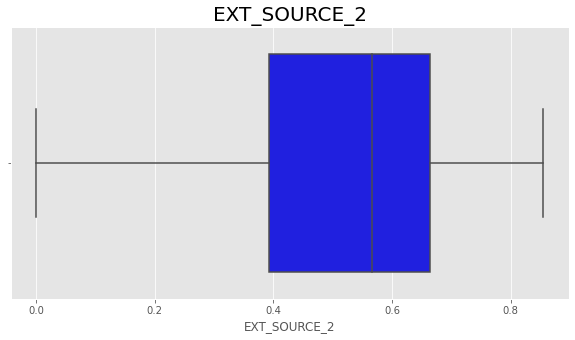

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(new_app['EXT_SOURCE_2'], color = 'b')
plt.title('EXT_SOURCE_2', size= 20)
plt.show()

As we can see in the above boxplot that there are no outliers. We can impute the Null Values with the Mean.

In [18]:
# Calculating the mean...
round(new_app['EXT_SOURCE_2'].mean(),2)

0.51

### 5.2 OCCUPATION_TYPE imputation

In [19]:
new_app.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Since it is a categorical data we will be imputing the missing value with the Mode.

In [20]:
# Finding and switching the Null Values with Mode...
new_app.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

### 5.3 AMT_REQ_CREDIT_BUREAU_YEAR Imputation

In [21]:
new_app.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
21.0        1
22.0        1
20.0        1
23.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

We can impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_YEAR' with mode.

In [22]:
# Calculating the mode...
new_app.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

### 5.4 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR' and 'AMT_REQ_CREDIT_BUREAU_QRT' Imputation

Since 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR' and 'AMT_REQ_CREDIT_BUREAU_QRT' comes in the same category as AMT_REQ_CREDIT_BUREAU_YEAR we will impute all of their missing values with mode.

In [25]:
# Calculating mode for AMT_REQ_CREDIT_BUREAU_MON...
new_app.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

In [26]:
# Calculating mode for AMT_REQ_CREDIT_BUREAU_WEEK...
new_app.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [27]:
# Calculating mode for AMT_REQ_CREDIT_BUREAU_DAY...
new_app.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [28]:
# Calculating mode for AMT_REQ_CREDIT_BUREAU_HOUR...
new_app.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [29]:
# Calculating mode for AMT_REQ_CREDIT_BUREAU_QRT...
new_app.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

### 5.5 AMT_GOODS_PRICE Imputation

In [30]:
new_app.AMT_GOODS_PRICE.value_counts() 

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

We will be checking for the outliers for AMT_GOODS_PRICE by using a boxplot.

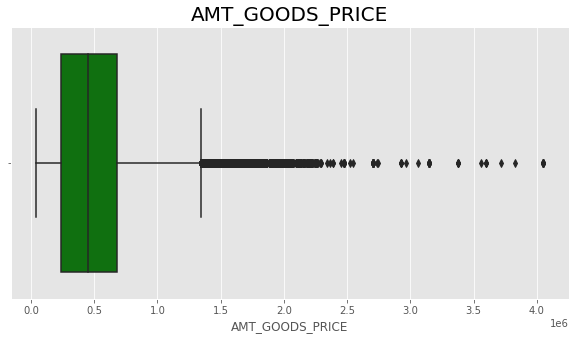

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(new_app['AMT_GOODS_PRICE'], color = 'g')
plt.title('AMT_GOODS_PRICE', size= 20)
plt.show()

As we can see there are outliers in the above boxplot so we will be using Median for the impuation of the missing values of AMT_GOODS_PRICE.

In [33]:
# Calculating the median for AMT_GOODS_PRICE...
new_app.AMT_GOODS_PRICE.median()

450000.0

### 5.6 AMT_ANNUITY Imputation

In [34]:
new_app.AMT_ANNUITY.value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
4635.0        1
65209.5       1
70920.0       1
85792.5       1
51331.5       1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

We will be checking for the outliers for AMT_ANNUITY by using a boxplot.

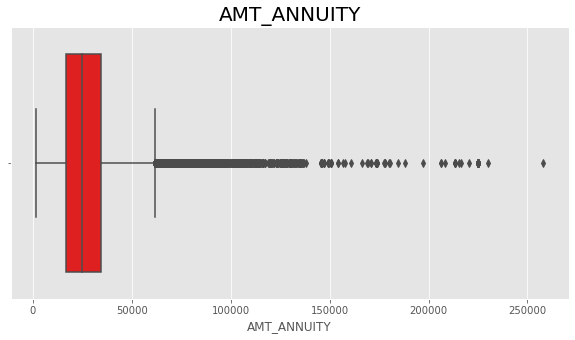

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(new_app['AMT_ANNUITY'], color = 'r')
plt.title('AMT_ANNUITY', size= 20)
plt.show()

As we can see there are outliers in the above boxplot so we will be using Median for the impuation of the missing values of AMT_ANNUITY.

In [36]:
# Calculating the median for AMT_ANNUITY...
new_app.AMT_ANNUITY.median()

24903.0

### 5.7 EXT_SOURCE_3 Imputation

In [39]:
new_app.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
0.581484    1141
0.689479    1138
0.595456    1136
0.554947    1132
0.621226    1109
0.657784    1092
0.607557    1067
0.643026    1066
0.450747    1064
0.626304    1054
0.673830    1030
0.651260    1029
0.511892    1026
0.706205     992
0.553165     984
0.593718     978
0.634706     969
0.740799     961
0.681706     959
0.565608     956
0.728141     953
0.771362     947
0.576209     943
0.586740     942
0.656158     931
0.631355     929
0.484851     922
0.709189     919
0.665855     912
0.684828     911
0.538863     911
0.617826     907
0.591977     904
0.513694     895
0.683269     895
0.579727     895
0.000527     886
0.733815     880
0.501075     879
0.619528     879
0.508287     877
0.754406     874
0.712155     867
0.832785     865
0.558507     864
0.524496     860
0.633032     854
0.659406     850
0.812823     849
0.636376     848
0.474051     837
0.647977     837
0.680139     837
0.394495     8

We will be checking for outliers in EXT_SOURCE_3 using boxplot.

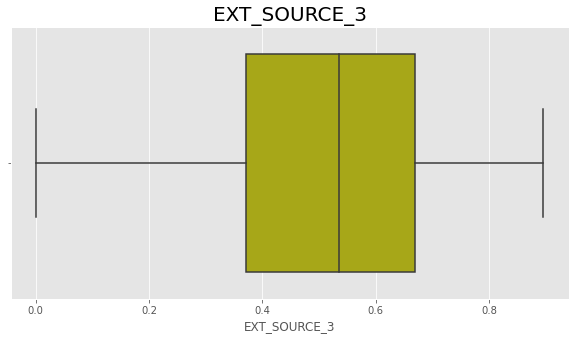

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(new_app['EXT_SOURCE_3'], color = 'y')
plt.title('EXT_SOURCE_3', size= 20)
plt.show()

As we can see in the above boxplot that there are no outliers. We can impute the Null Values with the Mean.

In [41]:
# Calculating the mean...
round(new_app['EXT_SOURCE_3'].mean(),2)

0.51

### 5.8 NAME_TYPE_SUITE Imputation

In [42]:
new_app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

We can impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_YEAR' with mode.

In [43]:
new_app.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

### 5.9 CNT_FAM_MEMBERS Imputation

In [44]:
new_app.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
15.0         1
11.0         1
13.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

We will be checking for outliers in CNT_FAM_MEMBERS using boxplot.

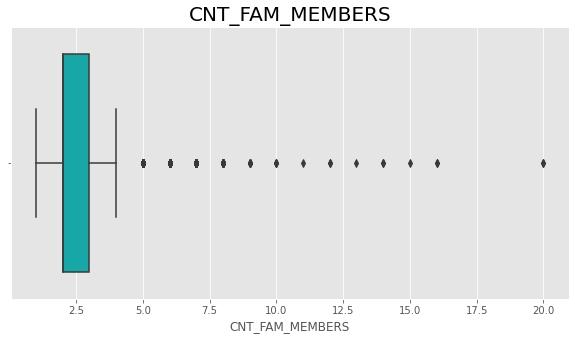

In [45]:
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(new_app['CNT_FAM_MEMBERS'], color = 'c')
plt.title('CNT_FAM_MEMBERS', size= 20)
plt.show()

As we can see in the above boxplot that there are outliers. We can impute the Null Values with the Median.

In [46]:
# Calculating the Median...
new_app.CNT_FAM_MEMBERS.median()

2.0

## 6. Fixing the Errors in Data types and Data in New Application Data Set

### 6.1 Checking the data types of all the columns

In [51]:
new_app.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

### 6.2 Changing all the negative and mixed values into absolute values in the columns which names starts with 'days'.

In [56]:
# The columns starting with 'DAYS'...
days_col = [col for col in new_app if col.startswith('DAYS')]
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [57]:
# Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive...
new_app[days_col]= abs(new_app[days_col])

In [65]:
# Checking the values...
new_app['DAYS_BIRTH']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [66]:
new_app['DAYS_EMPLOYED']

0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [67]:
new_app['DAYS_REGISTRATION']

0         3648.0
1         1186.0
2         4260.0
3         9833.0
4         4311.0
           ...  
307506    8456.0
307507    4388.0
307508    6737.0
307509    2562.0
307510    5128.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64

In [68]:
new_app['DAYS_ID_PUBLISH']

0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307506    1982
307507    4090
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64

In [71]:
new_app['DAYS_LAST_PHONE_CHANGE']

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

### 6.3 Changing 'XNA' in CODE_GENDER to make it more readable

In [73]:
new_app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [74]:
# Replacing XNA value with F as mode will be F...
new_app.loc[new_app.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
new_app.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

### 6.4 Changing 'XNA' in ORGANIZATION_TYPE to make it more readable

In [75]:
new_app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [76]:
# Replacing XNA with NaN...
new_app = new_app.replace('XNA',np.NaN)

In [78]:
new_app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

## 7. Binning of continuous variables for new applications

### 7.1 Binning AMT_INCOME_TOTAL 

In [79]:
new_app['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [80]:
# Creating A new categorical variable based on income total...
new_app['INCOME_GROUP']=pd.qcut(new_app['AMT_INCOME_TOTAL'],q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
new_app['INCOME_GROUP'].head(10)

0        High
1    VeryHigh
2     VeryLow
3      Medium
4      Medium
5         Low
6        High
7    VeryHigh
8         Low
9      Medium
Name: INCOME_GROUP, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

### 7.2 Binning AMT_CREDIT 

In [81]:
new_app['AMT_CREDIT'].quantile([0,0.1,0.3,0.6,0.8,1])

0.0      45000.0
0.1     180000.0
0.3     306306.0
0.6     604152.0
0.8     900000.0
1.0    4050000.0
Name: AMT_CREDIT, dtype: float64

In [82]:
# Creating A new categorical variable based on credit...
new_app['CREDIT_RANGE']=pd.qcut(new_app['AMT_CREDIT'],q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
new_app['CREDIT_RANGE'].head(10)

0      Medium
1    VeryHigh
2     VeryLow
3      Medium
4      Medium
5      Medium
6    VeryHigh
7    VeryHigh
8    VeryHigh
9      Medium
Name: CREDIT_RANGE, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

### 7.3 Binning AGE

In [83]:
# Converting 'DAYS_BIRTH' to years and creating a column AGE...
new_app['AGE']= (new_app['DAYS_BIRTH']/365).astype(int)
new_app.AGE.head(10)

0    25
1    45
2    52
3    52
4    54
5    46
6    37
7    51
8    55
9    39
Name: AGE, dtype: int32

In [84]:
# Bining 'AGE'
new_app['AGE_GROUP']=pd.cut(new_app['AGE'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [85]:
new_app['AGE_GROUP'].value_counts()

Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: AGE_GROUP, dtype: int64

## 8. Analysis for new applications

### 8.1 Checking imbalance in target

In [101]:
new_app['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

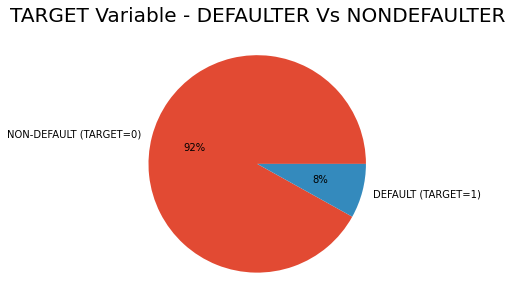

In [102]:
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
plt.pie(new_app['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'], autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER', size=20)
plt.show()

As we can see in the above diagram, there is an imbalance between people who defaulted and who didn't default. More than 92% of people didn't default as opposed to 8% who defaulted.

### 8.2 Distribution of days employed

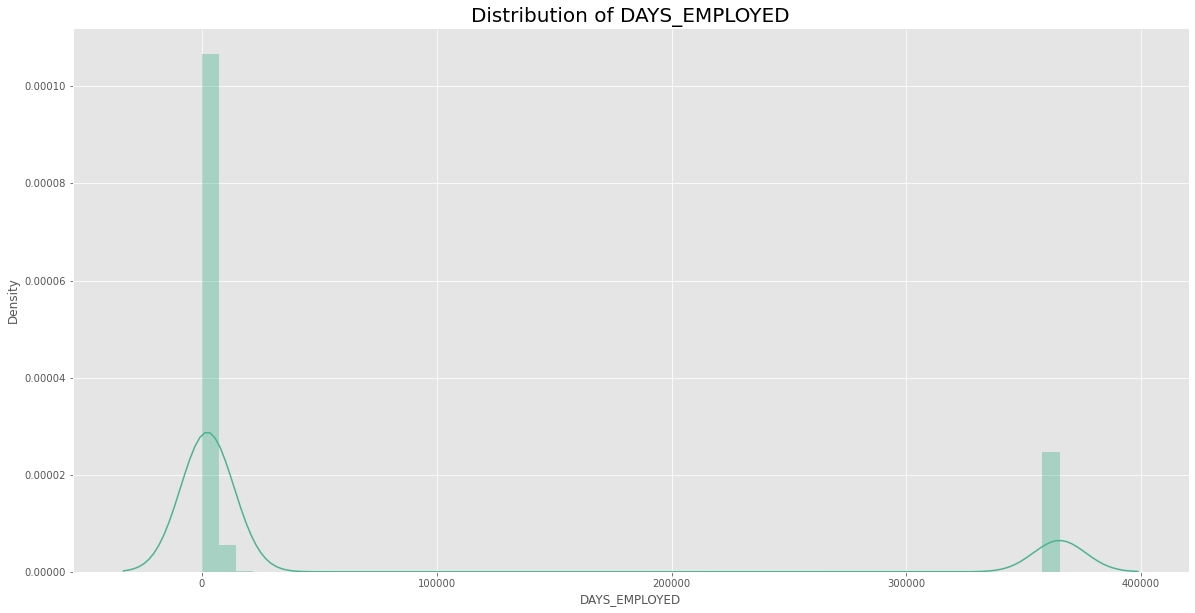

In [105]:
plt.figure(figsize=[20,10])
sns.distplot(new_app['DAYS_EMPLOYED'], color="#4CB391" )
plt.title('Distribution of DAYS_EMPLOYED', size=20)
plt.show()

Here, in the coloumn 'DAYS_EMPLOYED' which tells how many days before the application the person started current employment. We observe a value which is greater that 20,000 which is surely an outlier because 25,000/365 will be around 54 years. Considering that a person started working at age of 21, the person will be 21+54 will turn out to be 75 years old.

### 8.3 Distribution of AGE_GROUP

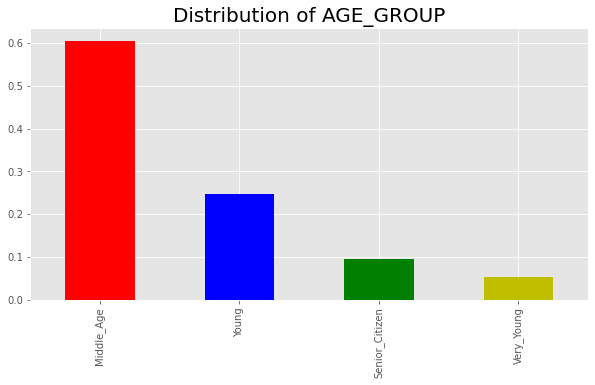

In [110]:
plt.figure(figsize=[10,5])
new_app['AGE_GROUP'].value_counts(normalize=True).plot.bar(color=['r','b','g','y'])
plt.title('Distribution of AGE_GROUP', size=20 )
plt.show()

As we can see clearly in the above bar chart middle age people applied the most for the loans as in the direct comparison with the very young population which has applied the least.

### 8.4 Distribution of INCOME_GROUP 

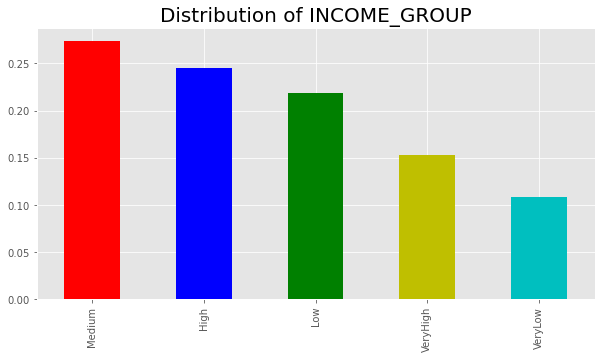

In [114]:
plt.figure(figsize=[10,5])
new_app['INCOME_GROUP'].value_counts(normalize=True).plot.bar(color=['r','b','g','y','c'])
plt.title('Distribution of INCOME_GROUP', size=20 )
plt.show()

As per the above diagram population with the Medium Income Group has applied more for the loans to cover expenses and also due to the capacty to pay pack on the other hand people with very low income has applied for the loan least due to the less pay back capacity as compared to the others.

### 8.5 Distribution of FLAG_OWN_CAR

In [115]:
new_app['FLAG_OWN_CAR'].value_counts(normalize=True)

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64

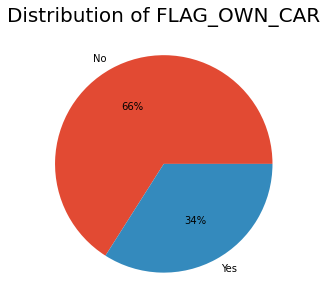

In [117]:
plt.figure(figsize=[10,5])
plt.pie(new_app['FLAG_OWN_CAR'].value_counts(normalize=True)*100,labels=['No','Yes'], autopct='%1.f%%')
plt.title('Distribution of FLAG_OWN_CAR', size=20)
plt.show()

As per the above Pie Chart the direct comparison between people who owns a car and people who doesn't owns a car has a huge difference which is 1/3 of people who applied for the loan owns the car where as 2/3 of the people doesn't. The probable cause for taking the loan could be a car purchase for the people who doesn't own car.

### 8.6 Distribution of FLAG_OWN_REALTY

In [118]:
new_app.FLAG_OWN_REALTY.value_counts(normalize=True)*100

Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64

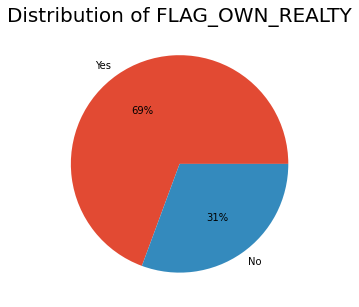

In [134]:
plt.figure(figsize=[10,5])
plt.pie(new_app.FLAG_OWN_REALTY.value_counts(normalize=True)*100,labels=['Yes','No'], autopct='%1.f%%')
plt.title('Distribution of FLAG_OWN_REALTY', size=20)
plt.show()

Above shown condition is opposite of for the population of FLAG_OWN_CAR percentage. More than 2/3 of applicants already owns a house or an appartment but less than 1/3 of applicants doesn't own a house or appartment which brings us to the probable reason for people to take loan could be to own a house if not a car, business or daily expenses.

### 8.7 Distribution of 'NAME_EDUCATION_TYPE'

In [135]:
new_app.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

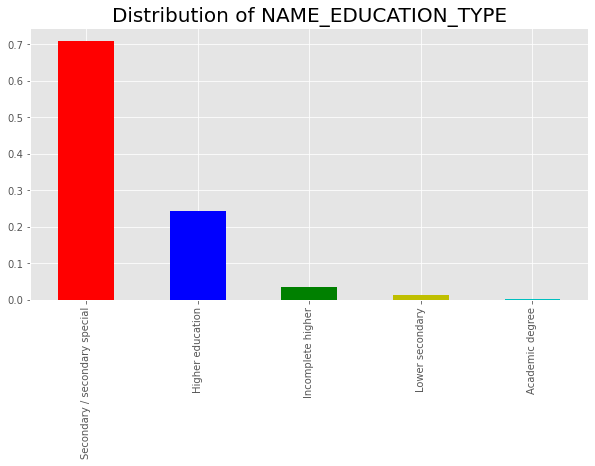

In [136]:
plt.figure(figsize=[10,5])
new_app['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.bar(color=['r','b','g','y','c'])
plt.title('Distribution of NAME_EDUCATION_TYPE', size=20 )
plt.show()

As per the above graph applicants with Secondary / Seconday Special are the most in number which points in the direction that they can be in the age group of either Young or higher and probably are working or has a business to be to apply for the loans to be able to repay.

### 8.8 Distribution of CODE_GENDER

In [140]:
new_app.CODE_GENDER.value_counts(normalize=True)*100

F    65.835694
M    34.164306
Name: CODE_GENDER, dtype: float64

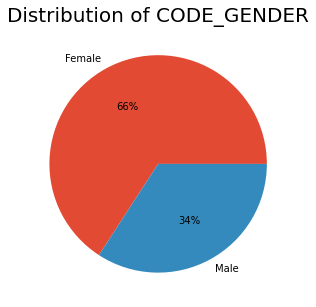

In [142]:
plt.figure(figsize=[10,5])
plt.pie(new_app.CODE_GENDER.value_counts(normalize=True)*100,labels=['Female','Male'], autopct='%1.f%%')
plt.title('Distribution of CODE_GENDER', size=20)
plt.show()

As per the above graph the 2/3 of the new applicants are females whereas males are only 1/3. Huge gender ratio difference.

### 8.9 Distribution of NAME_TYPE_SUITE

In [145]:
new_app.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

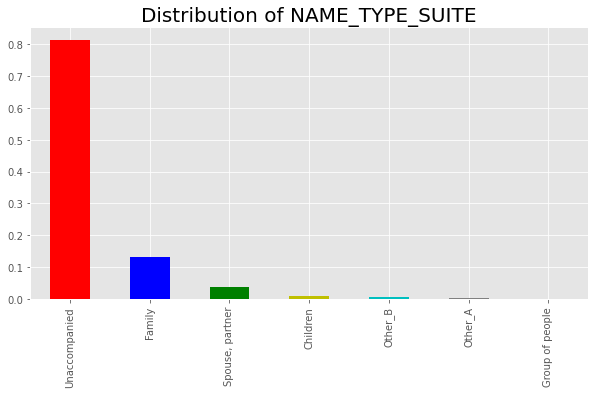

In [148]:
plt.figure(figsize=[10,5])
new_app['NAME_TYPE_SUITE'].value_counts(normalize=True).plot.bar(color=['r','b','g','y','c','grey','black'])
plt.title('Distribution of NAME_TYPE_SUITE', size=20 )
plt.show()

As per the above graph above 80% of the applicants have applied for the loan unaccompanied.

## 9. Univariate Analysis of Numerical Variables on the basis of 'Target' Variable for new applications

In [123]:
# Splitting data into 2 different dataframes...
NEWAPP0=new_app[new_app.TARGET==0]    # Dataframe with all the data related to non-defaulters
NEWAPP1=new_app[new_app.TARGET==1]    # Dataframe with all the data related to defaulters

In [130]:
# function to dist plot for continuous variables
def plotunidist(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a=NEWAPP0[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
            
    sns.distplot(a=NEWAPP1[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
        
    plt.show()

### 9.1 Credit Amount

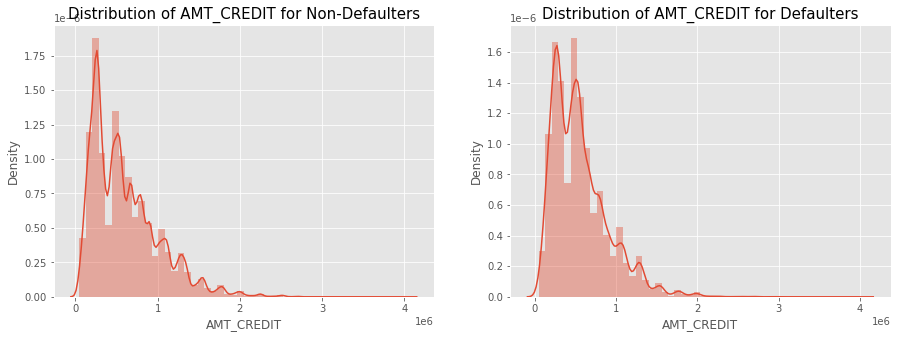

In [133]:
plotunidist('AMT_CREDIT')

As per the above comparison highest density is in the Non- defaulters but in over all comparison Defaulters seems to be more overall combined density as compared to the non defaulters. Although it is not much clear to put such statements.

### 9.2 Loan Annuity

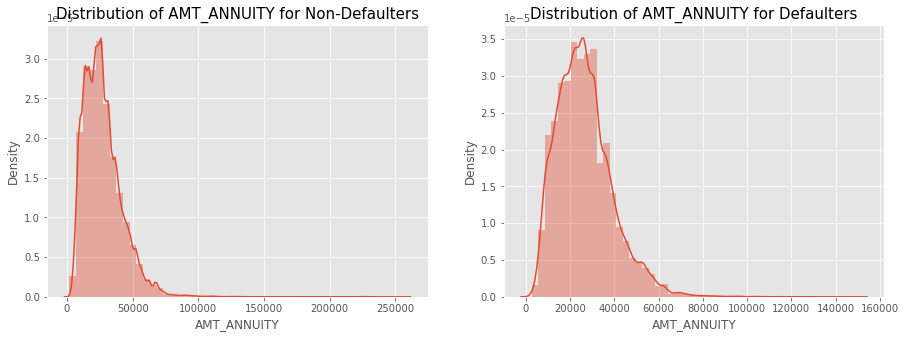

In [137]:
plotunidist('AMT_ANNUITY')

As per the above graph the Loan returned after a set period of time is allot more by defaulters as compared to the non-defaulters.

### 9.3 Days Employed

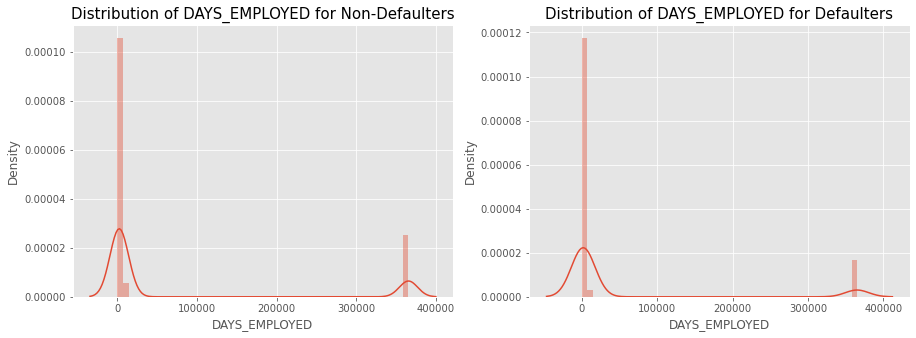

In [138]:
plotunidist('DAYS_EMPLOYED')

The Density of the Non-Defaulters is more than the defaulters but days employed is more in defaulters as compared the non defaulters.

### 9.4 Income

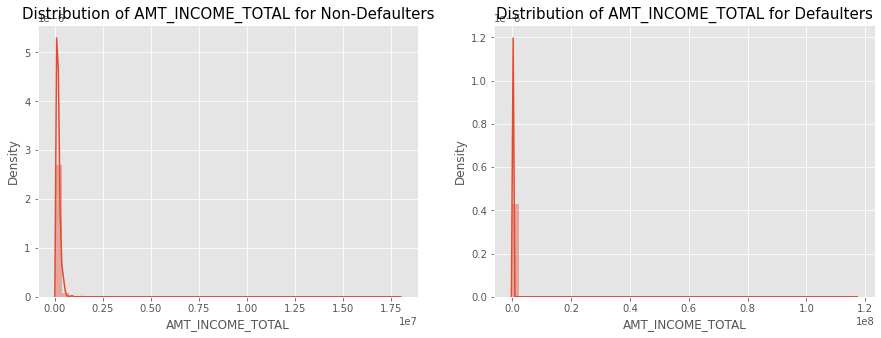

In [144]:
plotunidist('AMT_INCOME_TOTAL')

Graph is not much clear but one noticable thing is that the income of the non-defaulters is higher as compared to the defaulters.

### 9.5 CNT_FAM_MEMBERS

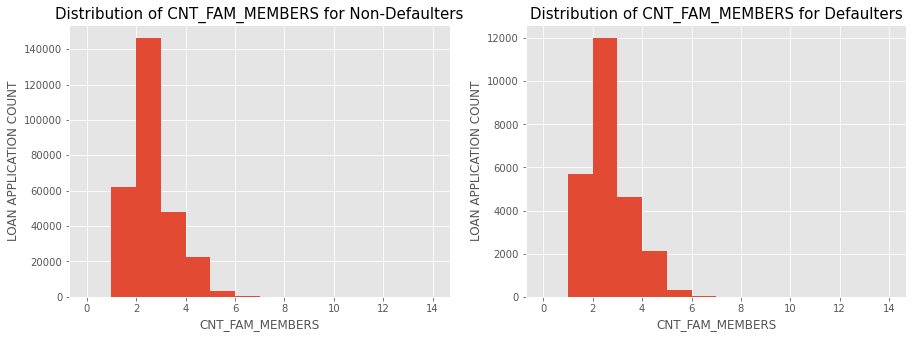

In [149]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
NEWAPP0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
NEWAPP1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

We can see that a family of 3 applies loan more often than the other families

## 10. Getting the top 10 correlation of the selected columns for new applications

In [150]:
#Getting the top 10 correlation in NEWAPP0
corr=NEWAPP0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
815,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999756,0.999756
3790,AGE,DAYS_BIRTH,0.999711,0.999711
2014,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508,0.998508
376,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
1259,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149,0.950149
1118,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571,0.878571
1511,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861,0.861861
2077,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332,0.859332
1700,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381,0.830381
377,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686


In [151]:
#Getting the top 10 correlation NEWAPP1
corr=NEWAPP1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
815,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999705,0.999705
3790,AGE,DAYS_BIRTH,0.999691,0.999691
2014,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269,0.998269
376,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
1259,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637,0.956637
1118,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
2077,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994,0.868994
1511,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885,0.847885
1700,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540,0.778540
377,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699


## 11. Bivariate Analysis of numerical variables for new applications

In [152]:
# function for scatter plot for continuous variables
def plotbivar(var1,var2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=NEWAPP0,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x=var1, y=var2,data=NEWAPP1,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=15)
            
    plt.show()

### 11.1 AMT_CREDIT and CNT_ FAM_MEMBERS for defaulters vs non-defaulters

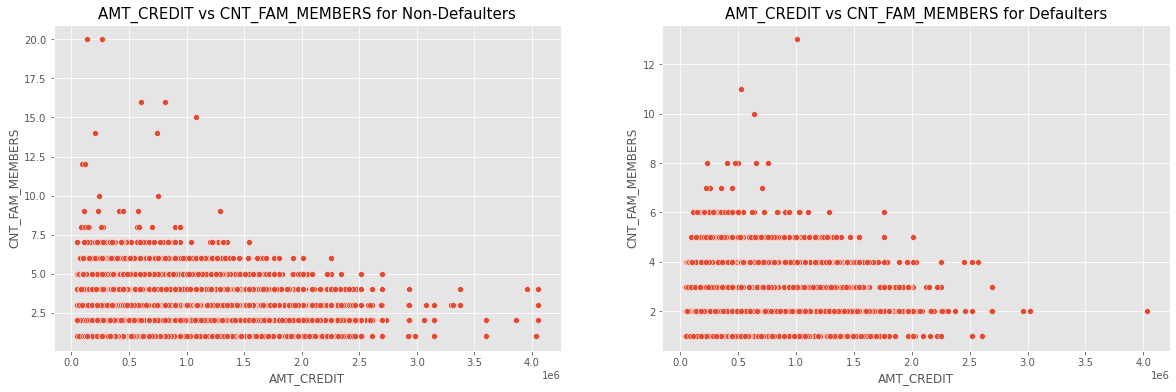

In [153]:
plotbivar('AMT_CREDIT','CNT_FAM_MEMBERS')

As we can see the left graph is a bit more dense as compared to the right. Non-Defaulters have highest Family members count as compared to the defaulters.

### 11.2 AMT_GOODS_PRICE and AMT_CREDIT for defaulters vs non-defaulters

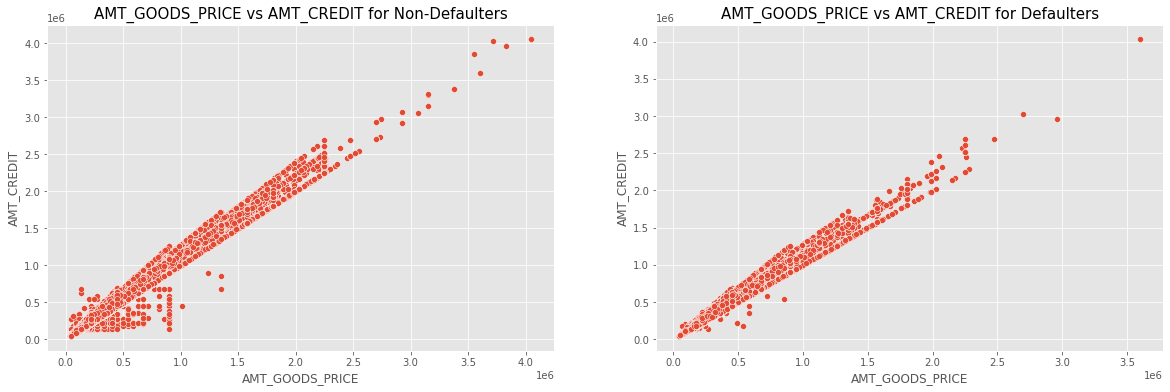

In [154]:
plotbivar('AMT_GOODS_PRICE','AMT_CREDIT')

As we can see in the above graphs the Non- defaulters is much denser which also indicates that the credit amount and the good price chances as higher for the non defaulters.

## 12. Univariate Analysis for Previous Applications

In [155]:
# function to count plot for categorical variables
def plot_uni(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=prev_app,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    
    plt.show()

### 12.1 NAME_CONTRACT_TYPE

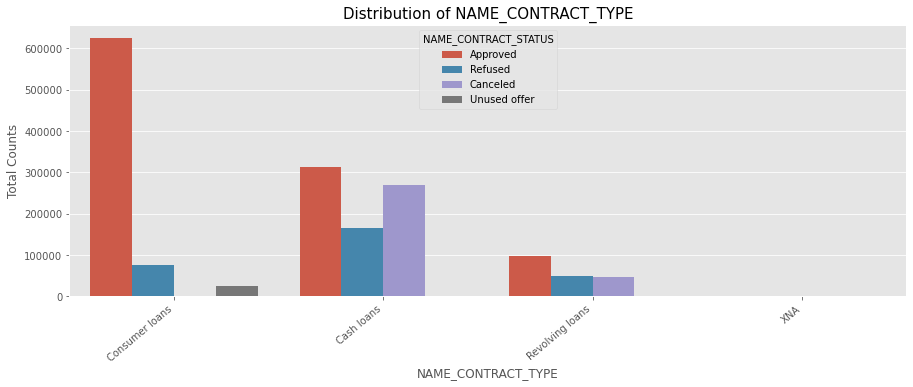

In [156]:
plot_uni('NAME_CONTRACT_TYPE')

From the above chart we can see that the consumer loans are the ones which are approved the most where as cash loans are either refused or cancelled the most.

### 12.2 NAME_PAYMENT_TYPE

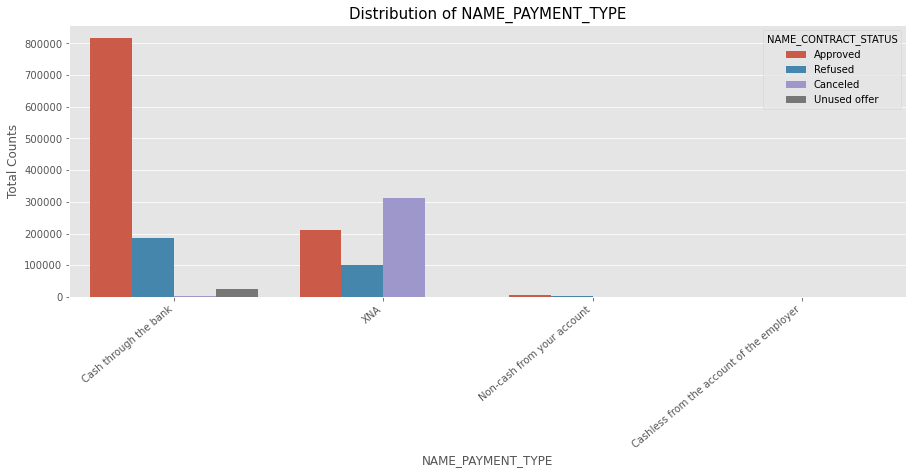

In [158]:
plot_uni('NAME_PAYMENT_TYPE')

From the above graph it is saf eto say that the most of the clients repay their loans via cash whereas Cashless from the account of the employer is the least.

### 12.3 NAME_CLIENT_TYPE

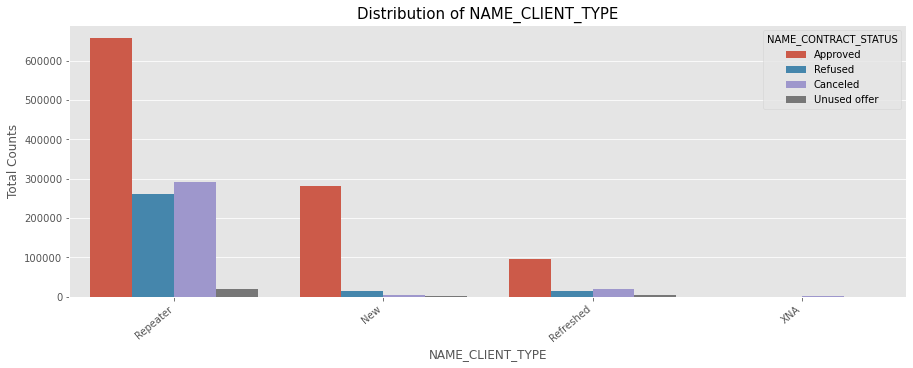

In [159]:
plot_uni('NAME_CLIENT_TYPE')

Most of the loan applications are from repeat customers, out of the total applications 70% of customers are repeaters. They also get refused and cancelled most often.

## 13. Correlation in the Previous Application dataset

In [160]:
#Getting the top 10 correlation PreviousApplication
corr=prev_app.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
129,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
130,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
87,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
417,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990,0.927990
128,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
86,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
65,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
372,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.803494,0.803494
297,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
298,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278


## 14. Bivariate analysis on numerical columns for previous applications

<Figure size 1440x576 with 0 Axes>

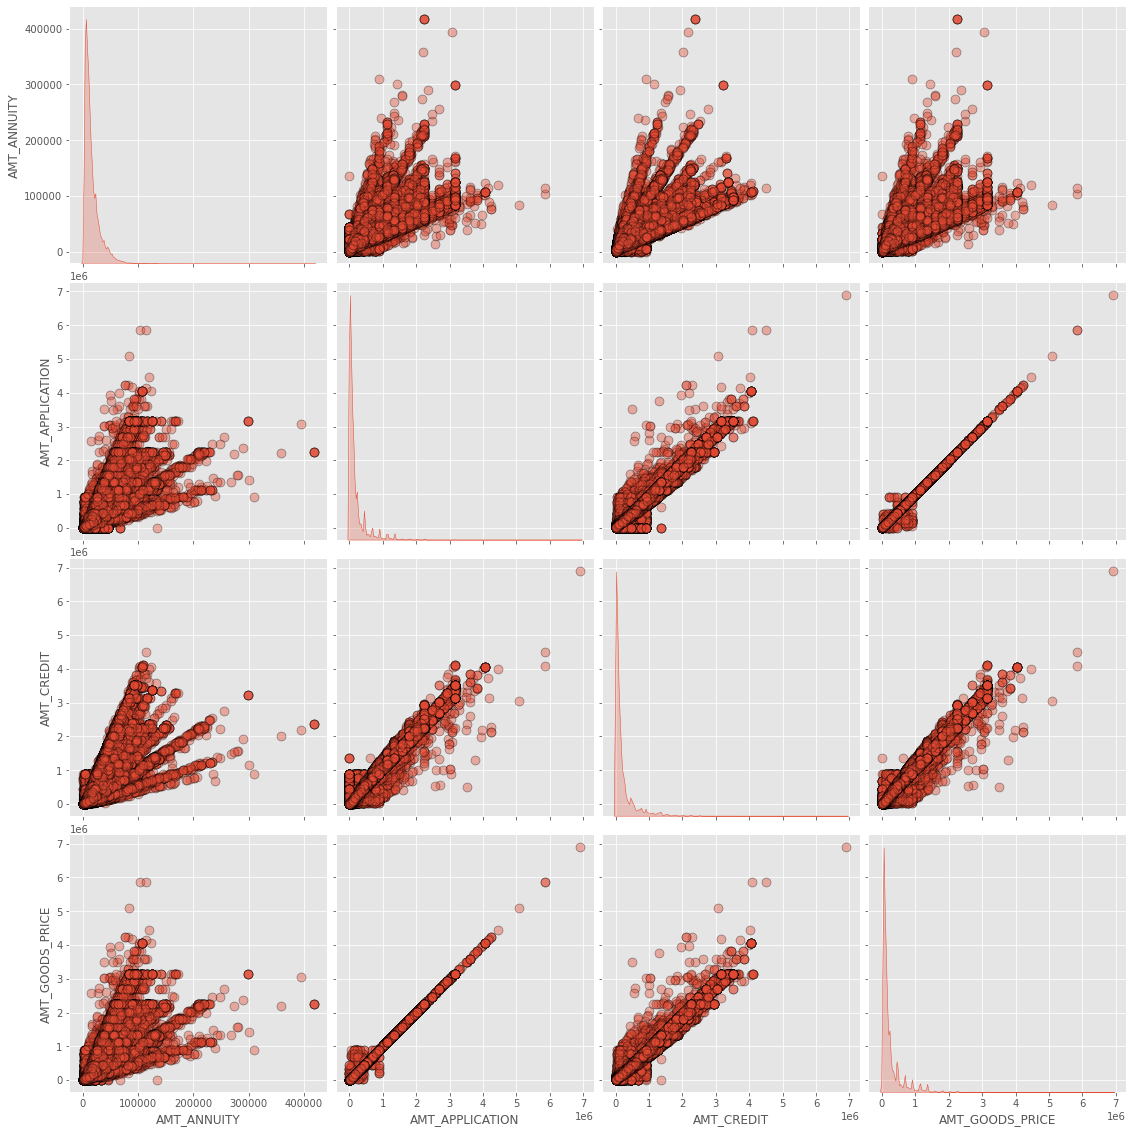

In [162]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(prev_app[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

Annuity of previous application has a very high and positive influence over: (Increase of annuity increases below factors)
(1) How much credit did client asked on the previous application
(2)Final credit amount on the previous application that was approved by the bank
(3) Goods price of good that client asked for on the previous application.

For how much credit did client ask on the previous application is highly influenced by the Goods price of good that client has asked for on the previous application

Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the goods price of good that client asked for on the previous application.

## 15. Using box plot to do some more bivariate analysis on categorical vs numeric columns

In [165]:
#by variant analysis function
def plot_by_cat_num(cat, num):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=prev_app)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

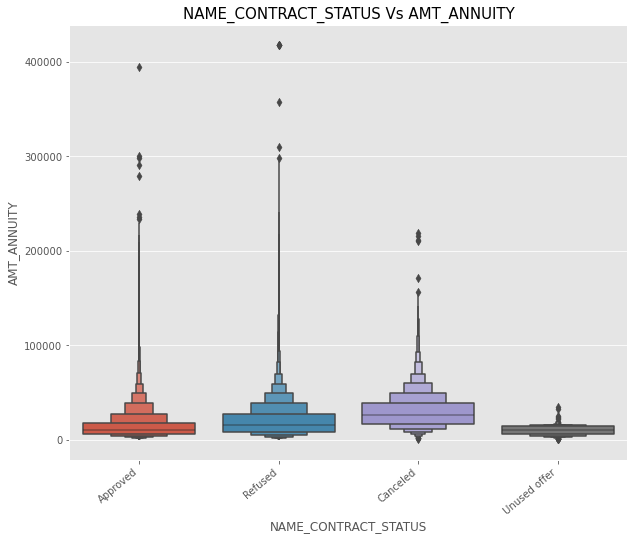

In [166]:
#by-varient analysis of Contract status and Annuity of previous appliction
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

From the above plot we can see that loan application for people with lower AMT_ANNUITY gets canceled or Unused most of the time.
We also see that applications with too high AMT ANNUITY also got refused more often than others.

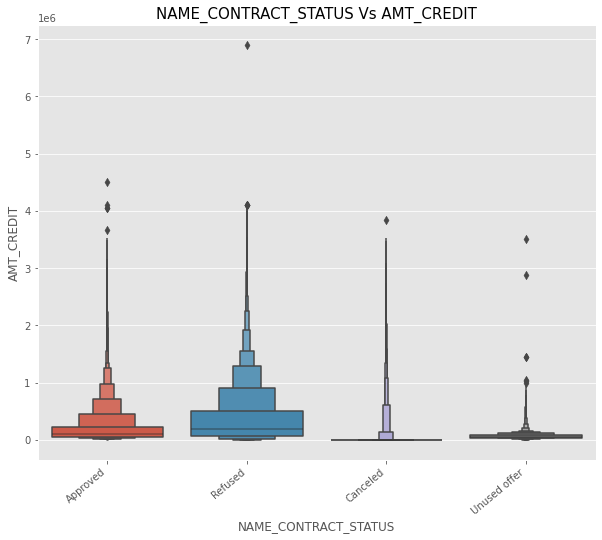

In [168]:
#by-varient analysis of Contract status and Final credit amount disbursed to the customer previously, after approval
plot_by_cat_num('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

We can infer that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time

## 16. Merging the files and analyzing the data

In [170]:
## Merging the two files to do some analysis
NewLeftPrev = pd.merge(new_app, prev_app, how='left', on=['SK_ID_CURR'])

In [171]:
NewLeftPrev.shape

(1430155, 113)

In [174]:
NewLeftPrev.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 113 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_x          object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_x                  float64 
 9    AMT_ANNUITY_x                 float64 
 10   AMT_GOODS_PRICE_x             float64 
 11   NAME_TYPE_SUITE_x             object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH               

## 17. Bivariate analysis between the merged dataframes

In [175]:
def plotuni_combined(Varx,Vary):
    # 100% bar chart
    plt.style.use('ggplot')
    sns.despine
    NewDat = NewLeftPrev.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

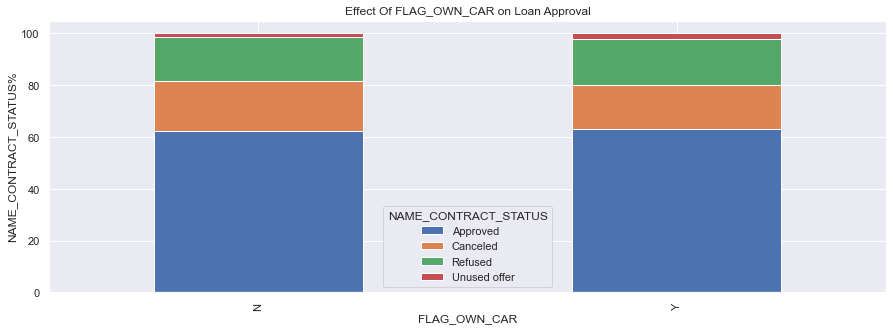

In [176]:
plotuni_combined('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

We see that car ownership doesn't have any effect on application approval or rejection. But we saw earlier that the people who has a car has lesser chances of default. The bank can add more weightage to car ownership while approving a loan amount

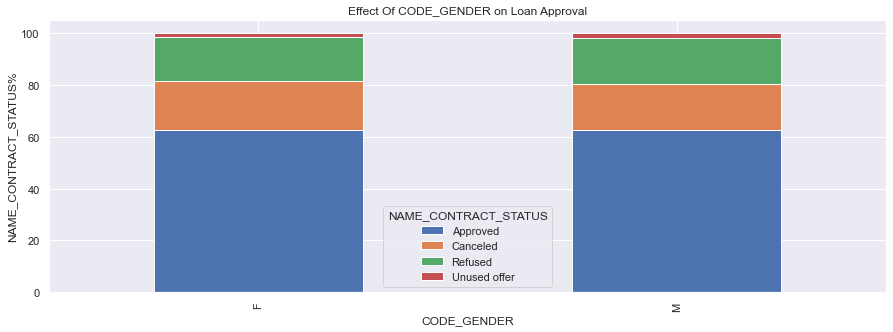

In [177]:
plotuni_combined('CODE_GENDER','NAME_CONTRACT_STATUS')

We see that code gender doesn't have any effect on application approval or rejection.
But we saw earlier that female have lesser chances of default compared to males. The bank can add more weightage to female while approving a loan amount.

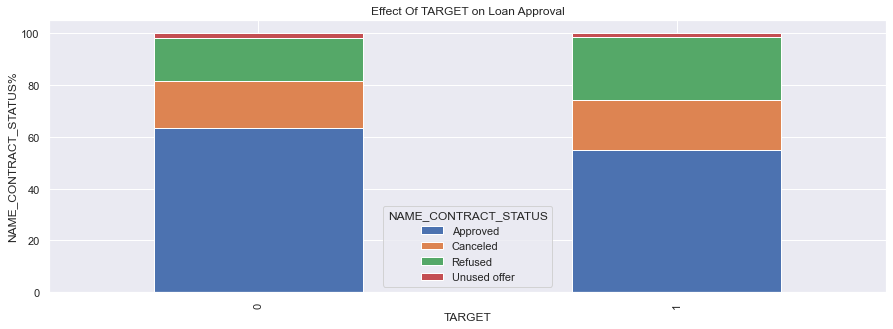

In [178]:
plotuni_combined('TARGET','NAME_CONTRACT_STATUS')

##### Target variable (0 - Non Defaulter 1 - Defaulter )

We can see that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting.

## 18. Insights

### 18.1 Application Data

1. The count of ‘Maternity Leave’ in ‘NAME_INCOME_TYPE’ is very less and it also has maximum % of payment difficulties- around 40%. Hence, client with income type as ‘Maternity leave’ are the driving factors for Loan Defaulters.

2. The count of ‘Low skilled Laborers’ in ‘OCCUPATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 17%. Hence, client with occupation type as ‘Low skilled Laborers’ are the driving factors for Loan Defaulters.

3. The count of ‘Lower Secondary’ in ‘NAME_EDUCATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 11%. Hence, client with education type as ‘Lower Secondary’ are the driving factors for Loan Defaulters.

4. People who owns realty are more to as compared to people who owns a car. 

5. People who's income is very low are the least to apply for the loans due the lack of capacity to repay back but surprisingly Medium income people are the most which leads to a probabilty of daily expenses and ability to pay back.

### 18.2 Previous Application Data

1. Repeaters who are applied for the lans again has a high ratio of approvale due to the trust but also has the highest refused or cancelled due to the bad past experience.

2. Loan repayment with cash is more popular in compare to the ones which are paid via bank account or via employer's bank account.

3. Most of approved loans are the consumer loans but most of the cancelled or refused loans are the cash loans due to the prediction of monety wastage and less chances of getting a repayment.